<a href="https://colab.research.google.com/github/Lavanya-INFO5731-Fall2024/Lavanya_INFO5731_Fall2024/blob/main/Nidamanuri_Lavanya_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import pandas as p

dataset = p.read_csv('Amazon_Product_Reviews_Alt.csv')

# (1) Function to count trigrams (N=3)
def count_trigrams(reviews):
    trigram_freq = {}  # Dictionary to store trigram frequencies
    for review in reviews:
        words = review.lower().split()  # Split review into words
        # Generate trigrams from word list
        for i in range(len(words) - 2):
            trigram = (words[i], words[i+1], words[i+2])  # Create a trigram
            # Update trigram frequency
            if trigram in trigram_freq:
                trigram_freq[trigram] += 1
            else:
                trigram_freq[trigram] = 1
    return trigram_freq

# Count trigram frequencies in the dataset
trigram_frequencies = count_trigrams(dataset['Review_text'])
print("Trigram Frequencies:")
for trigram, frequency in trigram_frequencies.items():
    print(f"{trigram}: {frequency}")

# (2) Function to count word frequencies and bigram frequencies
def count_bigrams(reviews):
    word_freq = {}      # Dictionary to store frequency of each word
    bigram_freq = {}    # Dictionary to store frequency of each bigram
    for review in reviews:
        words = review.lower().split()  # Convert review to lowercase and split into words
        # Count word frequencies
        for word in words:
            if word in word_freq:
                word_freq[word] += 1
            else:
                word_freq[word] = 1
        # Count bigram frequencies
        for i in range(len(words) - 1):
            bigram = (words[i], words[i + 1])  # Create bigram
            if bigram in bigram_freq:
                bigram_freq[bigram] += 1
            else:
                bigram_freq[bigram] = 1
    return word_freq, bigram_freq

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(word_freq, bigram_freq):
    bigram_probabilities = {}
    for bigram, bigram_count in bigram_freq.items():
        w2_count = word_freq[bigram[0]]  # Get the count of the first word in the bigram
        probability = bigram_count / w2_count  # Calculate probability as count(w2 w1) / count(w2)
        bigram_probabilities[bigram] = probability
    return bigram_probabilities

# Count word and bigram frequencies
word_frequencies, bigram_frequencies = count_bigrams(dataset['Review_text'])

# Calculate bigram probabilities
bigram_probabilities = calculate_bigram_probabilities(word_frequencies, bigram_frequencies)
print("Bigram Probabilities:")
for bigram, probability in bigram_probabilities.items():
    print(f"{bigram}: {probability:.2f}")

# (3) Helper function to tokenize text into words
def tokenize(text):
    words = text.lower().replace(".", "").replace("!", "").replace(",", "").split()
    return words

# Function to extract noun phrases (simple heuristic-based approach)
def extract_noun_phrases(review):
    words = tokenize(review)
    noun_phrases = []
    phrase = []
    for word in words:
        # Relaxed the heuristic to include more potential noun phrases
        if word in ["this", "that", "the", "a", "an", "really", "very", "good", "great", "bad", "terrible", "product", "service", "item"]:
            phrase.append(word)
        else:
            if len(phrase) > 0:  # Save noun phrase if it has at least one word
                noun_phrases.append(" ".join(phrase))
            phrase = []  # Reset phrase
    if len(phrase) > 0:  # Catch any remaining phrase at the end
        noun_phrases.append(" ".join(phrase))
    return noun_phrases

# Function to calculate relative probabilities of each noun phrase per review
def calculate_relative_probabilities(noun_phrase_freq, review_noun_phrase_freq):
    if not noun_phrase_freq:  # Check if noun_phrase_freq is empty
        return []  # Return empty list if no noun phrases were found
    max_freq = max(noun_phrase_freq.values())  # Find max frequency for each noun phrase across all reviews
    relative_probabilities = []
    for review_freq in review_noun_phrase_freq:
        review_probs = {}
        for phrase, freq in review_freq.items():
            review_probs[phrase] = freq / max_freq  # Calculate relative probability as frequency / max frequency
        relative_probabilities.append(review_probs)
    return relative_probabilities

# Step 1: Calculate noun phrase frequencies
noun_phrase_freq, review_noun_phrase_freq = calculate_noun_phrase_frequencies(dataset['Review_text'])

# Step 2: Calculate relative probabilities
relative_probabilities = calculate_relative_probabilities(noun_phrase_freq, review_noun_phrase_freq)

# Display results in table format
print("Relative Probabilities Table:")
header = "Review\t" + "\t".join(noun_phrase_freq.keys())
print(header)
for i, review_probs in enumerate(relative_probabilities):
    row = f"Review {i+1}\t"
    row += "\t".join(f"{review_probs.get(phrase, 0):.2f}" for phrase in noun_phrase_freq.keys())
    print(row)


Trigram Frequencies:
('i', 'absolutely', 'love'): 14
('absolutely', 'love', 'the'): 14
('love', 'the', 'dove'): 14
('the', 'dove', 'deep'): 14
('dove', 'deep', 'moisture'): 14
('deep', 'moisture', 'body'): 14
('moisture', 'body', 'wash!'): 14
('body', 'wash!', 'the'): 14
('wash!', 'the', 'luxurious'): 14
('the', 'luxurious', 'hydration'): 14
('luxurious', 'hydration', 'it'): 14
('hydration', 'it', 'provides'): 14
('it', 'provides', 'for'): 14
('provides', 'for', 'my'): 14
('for', 'my', 'dry'): 28
('my', 'dry', 'skin'): 14
('dry', 'skin', 'is'): 14
('skin', 'is', 'incredible.'): 14
('is', 'incredible.', 'the'): 14
('incredible.', 'the', 'pump'): 14
('the', 'pump', 'makes'): 14
('pump', 'makes', 'it'): 14
('makes', 'it', 'super'): 14
('it', 'super', 'convenient'): 14
('super', 'convenient', 'to'): 14
('convenient', 'to', 'use,'): 14
('to', 'use,', 'and'): 14
('use,', 'and', 'the'): 14
('and', 'the', 'scent'): 14
('the', 'scent', 'is'): 14
('scent', 'is', 'lovely'): 14
('is', 'lovely', 'w

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# Write your code here
import pandas as p
import math

# Sample dataset (replace this with the actual data from assignment two)
documents = p.read_csv('Amazon_Product_Reviews_Alt.csv')
documents = documents['Review_text'].tolist()

# Query to rank the documents against
query = "It is a creamy, moisturizing, gently scented soap that doesn’t leave a heavy residue on the skin or the shower walls/floor/doors. The larger bottle size is helpful, however I couldn’t rate this product 5 stars because it’s a bit difficult to get the last 1 1/2” of soap out of the bottle. The pump feature doesn’t give the consumer the ability to just tip the bottle upside down to use the remaining amount of soap. I will continue to use this product."

# Step 1: Tokenize text into words
def tokenize(text):
    text = text.lower()  # Convert to lowercase
    words = ""
    for char in text:
        if char.isalpha() or char.isspace():  # Keep only alphabetic characters and spaces
            words += char
    return words.split()  # Split cleaned text into words

# Step 2: Calculate Term Frequency (TF) for each term in each document
def calculate_tf(doc):
    term_count = {}
    words = tokenize(doc)
    for word in words:
        if word in term_count:
            term_count[word] += 1
        else:
            term_count[word] = 1
    total_terms = len(words)  # Total terms in the document
    tf = {word: count / total_terms for word, count in term_count.items()}
    return tf

# Step 3: Calculate Document Frequency (DF) for each term across all documents
def calculate_df(docs):
    df = {}
    for doc in docs:
        words = set(tokenize(doc))  # Unique words per document
        for word in words:
            if word in df:
                df[word] += 1
            else:
                df[word] = 1
    return df

# Step 4: Calculate Inverse Document Frequency (IDF)
def calculate_idf(df, total_docs):
    idf = {}
    for word, count in df.items():
        idf[word] = math.log(total_docs / count)  # IDF calculation
    return idf

# Step 5: Calculate TF-IDF for each document
def calculate_tf_idf(docs):
    tf_idf_matrix = []
    df = calculate_df(docs)  # Calculate DF for the dataset
    idf = calculate_idf(df, len(docs))  # Calculate IDF based on DF and total doc count

    for doc in docs:
        tf = calculate_tf(doc)  # Calculate TF for the document
        tf_idf = {word: tf[word] * idf[word] for word in tf.keys()}  # TF-IDF calculation
        tf_idf_matrix.append(tf_idf)

    return tf_idf_matrix, idf

# Step 6: Calculate the TF-IDF vector for the query
def calculate_query_vector(query, idf):
    tf = calculate_tf(query)  # Calculate TF for the query
    tf_idf = {word: tf[word] * idf[word] if word in idf else 0 for word in tf.keys()}
    return tf_idf

# Step 7: Calculate cosine similarity
def cosine_similarity(doc_vector, query_vector):
    # Dot product between document vector and query vector
    dot_product = sum(doc_vector.get(term, 0) * query_vector.get(term, 0) for term in query_vector)

    # Magnitude of the document vector and query vector
    doc_magnitude = math.sqrt(sum(weight ** 2 for weight in doc_vector.values()))
    query_magnitude = math.sqrt(sum(weight ** 2 for weight in query_vector.values()))

    # Avoid division by zero
    if doc_magnitude == 0 or query_magnitude == 0:
        return 0.0

    return dot_product / (doc_magnitude * query_magnitude)

# Main processing
# Step 1: Calculate TF-IDF matrix for all documents
tf_idf_matrix, idf = calculate_tf_idf(documents)

# Step 2: Calculate TF-IDF vector for the query
query_vector = calculate_query_vector(query, idf)

# Step 3: Calculate cosine similarity for each document with respect to the query
similarities = []
for i, doc_vector in enumerate(tf_idf_matrix):
    similarity = cosine_similarity(doc_vector, query_vector)
    similarities.append((i, similarity))

# Step 4: Sort documents by similarity in descending order
similarities.sort(key=lambda x: x[1], reverse=True)

# Display ranked documents
print("Documents ranked by similarity to the query:")
for doc_index, similarity in similarities:
    print(f"Document {doc_index + 1} (Similarity: {similarity:.4f}): {documents[doc_index]}")

Documents ranked by similarity to the query:
Document 5 (Similarity: 1.0000): It is a creamy, moisturizing, gently scented soap that doesn’t leave a heavy residue on the skin or the shower walls/floor/doors. The larger bottle size is helpful, however I couldn’t rate this product 5 stars because it’s a bit difficult to get the last 1 1/2” of soap out of the bottle. The pump feature doesn’t give the consumer the ability to just tip the bottle upside down to use the remaining amount of soap. I will continue to use this product.
Read more
Document 13 (Similarity: 1.0000): It is a creamy, moisturizing, gently scented soap that doesn’t leave a heavy residue on the skin or the shower walls/floor/doors. The larger bottle size is helpful, however I couldn’t rate this product 5 stars because it’s a bit difficult to get the last 1 1/2” of soap out of the bottle. The pump feature doesn’t give the consumer the ability to just tip the bottle upside down to use the remaining amount of soap. I will co

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Epoch 0, Loss: 0.0
Epoch 100, Loss: 0.0
Epoch 200, Loss: 0.0
Epoch 300, Loss: 0.0
Epoch 400, Loss: 0.0
Epoch 500, Loss: 0.0
Epoch 600, Loss: 0.0
Epoch 700, Loss: 0.0
Epoch 800, Loss: 0.0
Epoch 900, Loss: 0.0


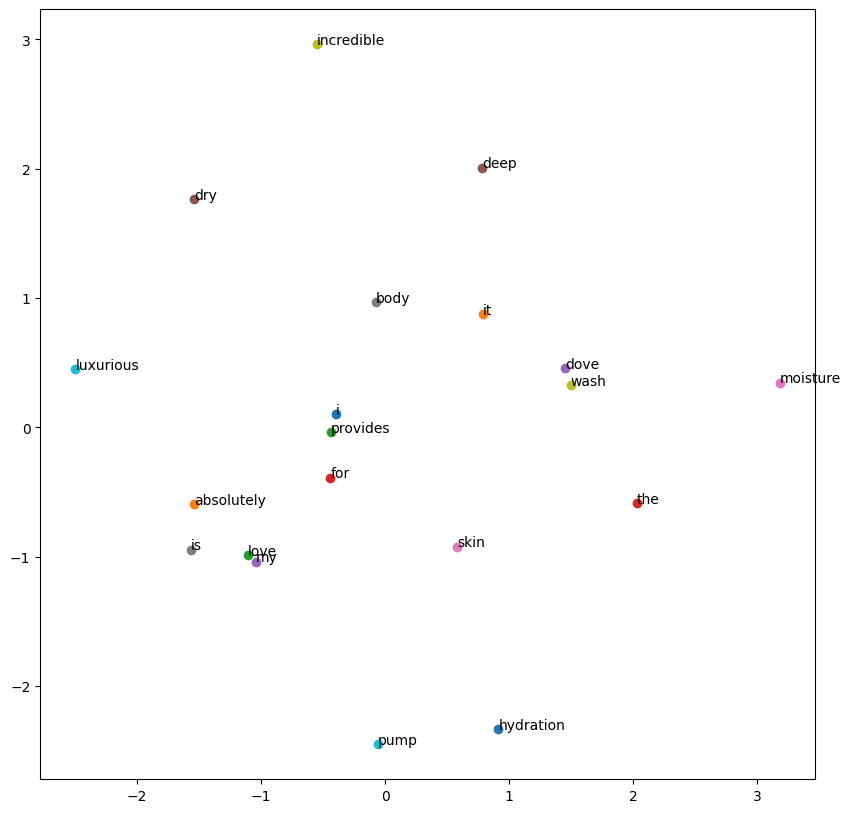

In [ ]:
# Write your code here
import pandas as p
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample dataset (replace with actual dataset for assignment 2)
documents = p.read_csv('Amazon_Product_Reviews_Alt.csv')
documents = documents['Review_text'].tolist()

# Step 1: Preprocess data (Tokenization)
def preprocess_text(documents):
    tokenized_docs = []
    for doc in documents:
        words = ''.join([char.lower() if char.isalpha() else ' ' for char in doc]).split()
        tokenized_docs.append(words)
    return tokenized_docs

# Step 2: Build Vocabulary
def build_vocab(tokenized_docs):
    vocab = defaultdict(int)
    for doc in tokenized_docs:
        for word in doc:
            vocab[word] += 1
    word_to_index = {word: idx for idx, (word, _) in enumerate(vocab.items())}
    index_to_word = {idx: word for word, idx in word_to_index.items()}
    return vocab, word_to_index, index_to_word

# Step 3: Generate Training Data for Word2Vec (Skip-gram model)
def generate_training_data(tokenized_docs, word_to_index, window_size=2):
    training_data = []
    for doc in tokenized_docs:
        for idx, word in enumerate(doc):
            for neighbor in doc[max(idx - window_size, 0): min(idx + window_size + 1, len(doc))]:
                if neighbor != word:
                    training_data.append((word_to_index[word], word_to_index[neighbor]))
    return training_data

# Step 4: Initialize Embedding Matrices
def initialize_embeddings(vocab_size, embedding_dim=300):
    word_embeddings = np.random.rand(vocab_size, embedding_dim)
    context_embeddings = np.random.rand(vocab_size, embedding_dim)
    return word_embeddings, context_embeddings

# Step 5: Train the Word2Vec Model
def train_word2vec(training_data, word_embeddings, context_embeddings, vocab_size, embedding_dim=300, epochs=1000, learning_rate=0.01):
    for epoch in range(epochs):
        total_loss = 0
        for target, context in training_data:
            # Get the embedding for the target word and context word
            target_embed = word_embeddings[target]
            context_embed = context_embeddings[context]

            # Calculate dot product
            score = np.dot(target_embed, context_embed)
            pred = 1 / (1 + np.exp(-score))  # Sigmoid

            # Calculate error (binary cross-entropy loss)
            error = (1 - pred)
            total_loss += error ** 2

            # Update embeddings with gradient descent
            word_embeddings[target] += learning_rate * error * context_embed
            context_embeddings[context] += learning_rate * error * target_embed

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {total_loss}")

    return word_embeddings

# Step 6: Preprocess the data
tokenized_docs = preprocess_text(documents)
vocab, word_to_index, index_to_word = build_vocab(tokenized_docs)
training_data = generate_training_data(tokenized_docs, word_to_index)

# Step 7: Initialize and Train Word2Vec Model
vocab_size = len(vocab)
embedding_dim = 300
word_embeddings, context_embeddings = initialize_embeddings(vocab_size, embedding_dim)
trained_embeddings = train_word2vec(training_data, word_embeddings, context_embeddings, vocab_size, embedding_dim)

# Step 8: Reduce Dimensionality for Visualization
def visualize_embeddings(word_embeddings, index_to_word, num_words=20):
    # Use PCA to reduce to 2D for visualization
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(word_embeddings[:num_words])

    # Plotting the words
    plt.figure(figsize=(10, 10))
    for i in range(num_words):
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
        plt.annotate(index_to_word[i], (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
    plt.show()

# Visualize the word embeddings
visualize_embeddings(trained_embeddings, index_to_word)







## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/Lavanya-INFO5731-Fall2024/Lavanya_INFO5731_Fall2024/blob/main/Annotated_Amazon_Product_Reviews.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
'''
This task was gratifying and difficult at the same time, offering a thorough exploration of several NLP approaches.
One of the biggest obstacles was starting from scratch when implementing each stage, especially for activities that often rely
on pre-existing libraries, such word embeddings, TF-IDF, and N-gram analysis.
A deep comprehension of data structures and mathematical concepts was necessary for writing the code by hand,
which made the procedure more difficult. Since preprocessing entails handling noise, punctuation, and sentence changes that can
impact the accuracy of results, handling natural language data presented another difficulty.
There were particular difficulties in training and visualizing word embeddings as well.
In order to correctly interpret the associations between words, techniques like PCA and t-SNE must be carefully tuned,
even though they are essential for reducing dimensionality.

The task has a lot of fun parts despite these difficulties. Seeing the theories we've learnt come to life was made possible by my
practical experience with NLP procedures. Word embedding visualization was especially interesting since it provided a concrete means
of investigating the relationships between words in high-dimensional space. Given that the sentiment analysis dataset will be
essential to the subsequent task, it was also fulfilling to create it by reading and annotating data.

Regarding the time allotted, it seemed adequate for the most of the activities; nonetheless, extra time might have permitted more
thorough testing and improvement. Overall, I gained useful experience and understanding of the intricacies and potential of NLP from
this assignment, and I'm excited to use these abilities in future projects.

'''